<h2>Analysis of flight data to predict landing distance<h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from matplotlib import style
style.use('ggplot')

d:\python35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Reading and Exploring the data
df = pd.read_csv('C:\\Users\\Karthik\\Desktop\\FAA1.csv')

<h3>Preliminary Analysis of the quality of Data<h3>

In [3]:
#A snapshot of the data
df.head()

,aircraft,duration,no_pasg,speed_ground,speed_air,height,pitch,distance
0,boeing,98.479091,53,107.915680,109.328376,27.418924,4.043515,3369.836364
1,boeing,125.733297,69,101.655589,102.851405,27.804716,4.117432,2987.803924
2,boeing,112.017001,61,71.051961,NaN,18.589386,4.434043,1144.922426
3,boeing,196.825691,56,85.813328,NaN,30.744597,3.884236,1664.218158
4,boeing,90.095381,70,59.888528,NaN,32.397688,4.026096,1050.264498


In [4]:
df.tail()

,aircraft,duration,no_pasg,speed_ground,speed_air,height,pitch,distance
795,airbus,98.461455,50,73.939616,NaN,42.353384,3.957104,1027.213466
796,airbus,114.234857,57,79.982703,NaN,42.244751,3.785954,1162.404395
797,airbus,118.576072,63,75.368172,NaN,31.340776,3.558020,960.255596
798,airbus,200.621366,63,77.148459,NaN,23.602423,3.020178,899.430559
799,airbus,124.140103,59,66.464640,NaN,48.067790,4.165660,853.864538


We have only one categorical data : aircraft

We have seven numerical data : duration no_pasg, speed_ground, speed_air, height, pitch, distance

Just by looking at the head and tail I suspect that speed_air might have lot of missing data. Lets investigate into this

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
aircraft        800 non-null object
duration        800 non-null float64
no_pasg         800 non-null int64
speed_ground    800 non-null float64
speed_air       200 non-null float64
height          800 non-null float64
pitch           800 non-null float64
distance        800 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 46.9+ KB


We can observe that only 25% of the observations have speed_air populated. It will be safe to drop the whole column to maintainthe integrity of the dataset

In [6]:
df = df.drop('speed_air', 1)

In [7]:
df.describe()

,duration,no_pasg,speed_ground,height,pitch,distance
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,154.006538,60.132500,79.541420,30.121772,4.018375,1544.520801
std,49.259234,7.527169,19.234887,10.276169,0.524816,938.233100
min,14.764207,29.000000,27.735715,-3.546252,2.284480,34.080783
25%,119.493891,55.000000,65.867417,23.337992,3.658035,900.952180
50%,153.948098,60.000000,79.642804,30.146745,4.020067,1267.438320
75%,188.914911,65.000000,92.325004,36.981469,4.388005,1960.441987
max,305.621711,87.000000,141.218635,59.945964,5.926784,6533.047651


<h3>Preparing data for Regression<h3>

In [8]:
#assigning the aircraft categorical data numeric values
OneHotEncoded = pd.get_dummies(df['aircraft'].tolist())
df = df.drop('aircraft', 1)
df = pd.concat([OneHotEncoded, df], axis=1)

In [9]:
df.head()

,airbus,boeing,duration,no_pasg,speed_ground,height,pitch,distance
0,0,1,98.479091,53,107.915680,27.418924,4.043515,3369.836364
1,0,1,125.733297,69,101.655589,27.804716,4.117432,2987.803924
2,0,1,112.017001,61,71.051961,18.589386,4.434043,1144.922426
3,0,1,196.825691,56,85.813328,30.744597,3.884236,1664.218158
4,0,1,90.095381,70,59.888528,32.397688,4.026096,1050.264498


In [10]:
#The problem statement is to determine the landing distance. Hence 'distance' will be the dependent variable. Lets split the dataset
#into X (independent variables) and y (dependent variable)

X = df.iloc[:,:-1].values
y = df.iloc[:, 7].values

#avoiding the dummy variable trap
X = X[:, 1:]

<h3>Modeling<h3> 

In [11]:
#building optimal model using backward elimination 
import statsmodels.formula.api as sm
X = np.append(arr=np.ones((800,1)).astype(int), values = X, axis=1)

In [12]:
X_opt = X[:, [0,1,2,3,4,5,6]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     713.6
Date:                Sat, 12 Aug 2017   Prob (F-statistic):          1.35e-315
Time:                        22:49:06   Log-Likelihood:                -5867.4
No. Observations:                 800   AIC:                         1.175e+04
Df Residuals:                     793   BIC:                         1.178e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2582.5063    172.242    -14.993      0.000   -2920.610   -2244.402
x1           499.2367     28.315     17.632      0.000     443.656     554.817
x2             0.0742      0.268      0.277      0.782      -0.453       0.601
x3            -2.1437      1.752     -1.224      0.221      -5.582       1.295
x4            42.8512      0.687     62.353      0.000      41.502      44.200
x5            14.0554      1.283     10.958      0.000      11.538      16.573
x6            40.5780     26.975      1.504      0.133     -12.373      93.529
==============================================================================
Omnibus:                      310.879   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1175.281
Skew:                           1.840   Prob(JB):                    6.18e-256
Kurtosis:                       7.660   Cond. No.                     2.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<span>We can see that the P-value for x2 (which is the duration column) is higher that the 0.05 significance level. Hence we re-fit the model without this variable<span>

In [13]:
X_opt = X[:, [0,1,3,4,5,6]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     857.3
Date:                Sat, 12 Aug 2017   Prob (F-statistic):          4.55e-317
Time:                        22:49:07   Log-Likelihood:                -5867.4
No. Observations:                 800   AIC:                         1.175e+04
Df Residuals:                     794   BIC:                         1.177e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2568.0526    164.029    -15.656      0.000   -2890.033   -2246.072
x1           498.9704     28.282     17.643      0.000     443.455     554.486
x2            -2.1610      1.749     -1.235      0.217      -5.595       1.273
x3            42.8391      0.685     62.499      0.000      41.494      44.185
x4            14.0528      1.282     10.963      0.000      11.537      16.569
x5            40.3784     26.950      1.498      0.134     -12.523      93.280
==============================================================================
Omnibus:                      311.093   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1177.460
Skew:                           1.841   Prob(JB):                    2.08e-256
Kurtosis:                       7.665   Cond. No.                     1.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<span>We can see that the P-value for x2 (which is the no_pasg column) is higher that the 0.05 significance level. Hence we re-fit the model without this variable<span>

In [14]:
X_opt = X[:, [0,1,4,5,6]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     1070.
Date:                Sat, 12 Aug 2017   Prob (F-statistic):          2.80e-318
Time:                        22:49:07   Log-Likelihood:                -5868.2
No. Observations:                 800   AIC:                         1.175e+04
Df Residuals:                     795   BIC:                         1.177e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2699.3101    124.999    -21.595      0.000   -2944.677   -2453.944
x1           499.7709     28.284     17.670      0.000     444.251     555.290
x2            42.8459      0.686     62.490      0.000      41.500      44.192
x3            14.0535      1.282     10.960      0.000      11.536      16.570
x4            40.4663     26.959      1.501      0.134     -12.452      93.385
==============================================================================
Omnibus:                      311.683   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1182.912
Skew:                           1.844   Prob(JB):                    1.36e-257
Kurtosis:                       7.679   Cond. No.                         841.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span>We can see that the P-value for x4 (which is the pitch column) is higher that the 0.05 significance level. Hence we re-fit the model without this variable<span>

In [15]:
X_opt = X[:, [0,1,4,5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     1424.
Date:                Sat, 12 Aug 2017   Prob (F-statistic):          2.10e-319
Time:                        22:49:08   Log-Likelihood:                -5869.3
No. Observations:                 800   AIC:                         1.175e+04
Df Residuals:                     796   BIC:                         1.177e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2544.1153     70.306    -36.187      0.000   -2682.121   -2406.109
x1           515.1843     26.375     19.533      0.000     463.412     566.956
x2            42.8191      0.686     62.423      0.000      41.473      44.166
x3            14.1144      1.283     11.004      0.000      11.597      16.632
==============================================================================
Omnibus:                      314.023   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1209.965
Skew:                           1.852   Prob(JB):                    1.82e-263
Kurtosis:                       7.751   Cond. No.                         467.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#dropping columns - duration, no_pasg and pitch as they do not add any value to the model
df = df.drop('duration', 1)
df = df.drop('no_pasg', 1)
df = df.drop('pitch', 1)


X = df.iloc[:,:-1].values
y = df.iloc[:, 4].values

#avoiding the dummy variable trap
X = X[:, 1:]

#splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#fitting the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

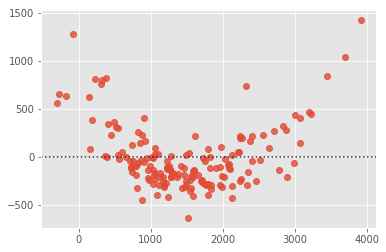

In [17]:
#plotting the residuals of the predicted and actual results to check the best fit for the model 
from seaborn import residplot
residplot(y_pred, y_test)
plt.show()

<span> Since we can see a patter between the residuals of the predicted and the actual values, it indicates that there is a relationship amoung them. We can introduce a squared term to find out more information<span>

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
poly_reg_test = PolynomialFeatures(degree=2)
X_poly_test = poly_reg_test.fit_transform(X_test)
y_pred_2 = lin_reg_2.predict(X_poly_test)

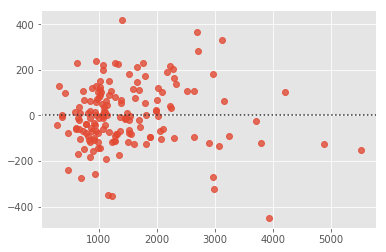

In [21]:
residplot(y_pred_2, y_test)
plt.show()

In [22]:
lin_reg_2.score(X_poly_test, y_test)

0.97549499744026325

In [23]:
lin_reg_2.coef_

array([  0.00000000e+00,   1.91275057e+02,  -7.08174594e+01,
         1.23197287e+01,   1.91275057e+02,   4.84925076e-01,
        -5.76004086e-01,   7.02410065e-01,  -4.79126586e-03,
         2.96370743e-02])

In [24]:
X_train = np.append(arr=np.ones((640,1)).astype(int), values = X_train, axis=1)
from sklearn.preprocessing import PolynomialFeatures
poly_reg_OLS = PolynomialFeatures(degree=2)
X_poly_OLS = poly_reg_OLS.fit_transform(X_train)


regressor_OLS_poly = sm.OLS(endog = y_train, exog = X_poly_OLS).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     1424.
Date:                Sat, 12 Aug 2017   Prob (F-statistic):          2.10e-319
Time:                        22:49:49   Log-Likelihood:                -5869.3
No. Observations:                 800   AIC:                         1.175e+04
Df Residuals:                     796   BIC:                         1.177e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2544.1153     70.306    -36.187      0.000   -2682.121   -2406.109
x1           515.1843     26.375     19.533      0.000     463.412     566.956
x2            42.8191      0.686     62.423      0.000      41.473      44.166
x3            14.1144      1.283     11.004      0.000      11.597      16.632
==============================================================================
Omnibus:                      314.023   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1209.965
Skew:                           1.852   Prob(JB):                    1.82e-263
Kurtosis:                       7.751   Cond. No.                         467.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span>I belive, this would be the best model to fit the data and predict landing distances</span>